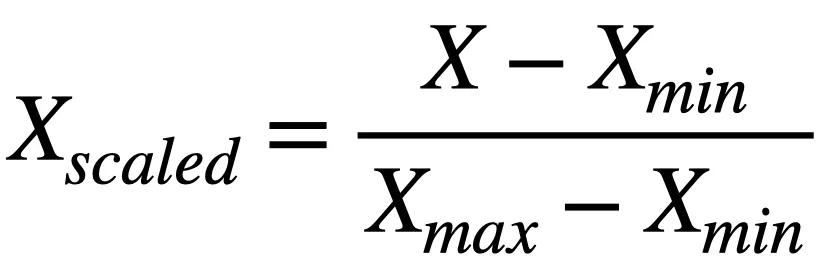

In [1]:
'''Feature Scaling is a technique to standardize the independent features present in the data.
It is performed during the data pre-processing to handle highly varying values. If feature scaling is not done then
machine learning algorithm tends to use greater values
as higher and consider smaller values as lower regardless of the unit of the values. '''

'Feature Scaling is a technique to standardize the independent features present in the data.\nIt is performed during the data pre-processing to handle highly varying values. If feature scaling is not done then\nmachine learning algorithm tends to use greater values\nas higher and consider smaller values as lower regardless of the unit of the values. '

In [3]:
import pandas as pd
import numpy as np # import libary

In [6]:
df=pd.read_csv('carprices.csv')
df.head() # read the file

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4


In [15]:
df.dropna(subset=['Age(yrs)'], inplace=True)

In [16]:
from sklearn.impute import SimpleImputer

In [17]:
imp=SimpleImputer(missing_values=np.nan,strategy='mean')
imp

SimpleImputer()

In [18]:
x=df.iloc[:,:-1] # input
y=df.iloc[:,3] # output

In [19]:
x.iloc[:,1:3]=imp.fit_transform(x.iloc[:,1:3])

In [20]:
x.shape

(26, 3)

In [21]:
dic={'Car Model':str,'Mileage':int,'Sell Price($)':int}
dic

{'Car Model': str, 'Mileage': int, 'Sell Price($)': int}

In [22]:
# one hot encoding

In [23]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [24]:
one=OneHotEncoder(sparse_output=False,dtype=int).set_output(transform='pandas')

In [25]:
one_transform=one.fit_transform(df[['Car Model']])

In [26]:
x=pd.concat([x,one_transform],axis=1).drop(columns=['Car Model'])

In [28]:
label_y=LabelEncoder()
y=label_y.fit_transform(y)
y

array([4, 1, 3, 0, 2, 3, 3, 4, 6, 4, 5, 5, 3, 4, 1, 3, 0, 2, 3, 3, 4, 6,
       4, 5, 5, 3])

In [29]:
# feature scalling using standnization

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
sc=StandardScaler()

In [32]:
x1=x.iloc[:,0:2]
x1

,Mileage,Sell Price($)
0,69000,18000
1,35000,34000
2,57000,26100
3,22500,40000
4,46000,31500
5,59000,29400
6,52000,32000
7,72000,19300
8,91000,12000
9,67000,22000


In [33]:
x_new=sc.fit_transform(x1)
x_new

array([[ 0.44026413, -1.04335793],
       [-1.40425478,  1.03735587],
       [-0.21074255,  0.01000343],
       [-2.08238673,  1.81762355],
       [-0.80749866,  0.71224434],
       [-0.10224143,  0.43915065],
       [-0.48199533,  0.77726665],
       [ 0.6030158 , -0.87429994],
       [ 1.63377636, -1.82362561],
       [ 0.33176302, -0.52317948],
       [ 1.19977192, -0.78326871],
       [ 0.98276969, -0.65322409],
       [-0.10224143,  0.90731126],
       [ 0.44026413, -1.04335793],
       [-1.40425478,  1.03735587],
       [-0.21074255,  0.01000343],
       [-2.08238673,  1.81762355],
       [-0.80749866,  0.71224434],
       [-0.10224143,  0.43915065],
       [-0.48199533,  0.77726665],
       [ 0.6030158 , -0.87429994],
       [ 1.63377636, -1.82362561],
       [ 0.33176302, -0.52317948],
       [ 1.19977192, -0.78326871],
       [ 0.98276969, -0.65322409],
       [-0.10224143,  0.90731126]])

In [37]:
x_new=pd.DataFrame(x_new,columns=['Mileage','Sell Price($)'])

In [38]:
x_new = pd.get_dummies(x['Mileage'])
x_combined = pd.concat([x.iloc[:, 2:], x_new], axis='columns')

In [40]:
merged=pd.concat([x.iloc[:,2:],x_new],axis='columns')
merged

,Car Model_Audi A5,Car Model_BMW X5,Car Model_Mercedez Benz C class,22500,35000,46000,52000,57000,59000,67000,69000,72000,79000,83000,91000
0,0,1,0,False,False,False,False,False,False,False,True,False,False,False,False
1,0,1,0,False,True,False,False,False,False,False,False,False,False,False,False
2,0,1,0,False,False,False,False,True,False,False,False,False,False,False,False
3,0,1,0,True,False,False,False,False,False,False,False,False,False,False,False
4,0,1,0,False,False,True,False,False,False,False,False,False,False,False,False
5,1,0,0,False,False,False,False,False,True,False,False,False,False,False,False
6,1,0,0,False,False,False,True,False,False,False,False,False,False,False,False
7,1,0,0,False,False,False,False,False,False,False,False,True,False,False,False
8,1,0,0,False,False,False,False,False,False,False,False,False,False,False,True
9,0,0,1,False,False,False,False,False,False,True,False,False,False,False,False


In [41]:
# min max

In [48]:
from sklearn.preprocessing import minmax_scale
scaled_data = minmax_scale(x, feature_range=(0, 1))

In [50]:
x1=x.iloc[:,:0:2]

In [51]:
x_new=sc.fit_transform(x1)

ValueError: at least one array or dtype is required